## Visualizing distributions of data

An early step in any effort to analyze or model data should be to understand how the variables are distributed.

- What range do the observations cover? 
- What is their central tendency? 
- Are they heavily skewed in one direction? Is there evidence for bimodality?
- Are there significant outliers?
- Do the answers to these questions vary across subsets defined by other variables?

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import math
import numpy as np

# Display Options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## New York City Airbnb Data

In [2]:
listings = pd.read_csv(os.path.join(os.getcwd(), 'input', 'AB_NYC_2019.csv'))

## 1.0 Histograms

Let's start with one of  the most common approaches to visualizing a distribution, *the histogram*.

In [3]:
def style_axes(ax, xlim, major_step, minor_step):
    ax.set_xlabel('Price per Night (USD)')
    ax.set_xticks(np.arange(0, xlim+1, major_step), minor=False)
    ax.set_xticks(np.arange(minor_step, xlim, minor_step), minor=True)
    ax.tick_params(axis='both', which = 'major', length = 6)
    ax.tick_params(axis='both', which = 'minor', length = 4)

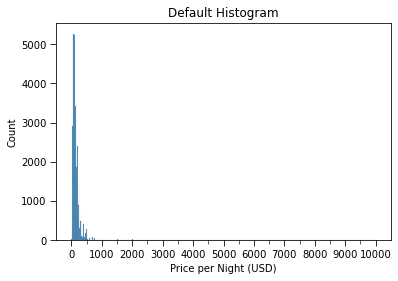

In [4]:
ax = sns.histplot( data = listings, x = "price", kde=False, binwidth = 15)
style_axes(ax, 10000, 1000, 500)
ax.set_title('Default Histogram')
plt.show()

This plot immediately affords a few insights into the ``price`` variable. For instance, we can see that while the range may go up to 10,000 dollars (for some crazy penthouses, I imagine), the majority of the listings have a price of around 250 dollars. 

Here are a few descriptive stats:

In [5]:
listings['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

### 1.1 Area of Interest - Inspecting quantiles

In [6]:
listings['price'].quantile([0.9, 0.95, 0.98, 0.99])

0.90    269.0
0.95    355.0
0.98    550.0
0.99    799.0
Name: price, dtype: float64

We'll focus now on prices $ \leq 550$

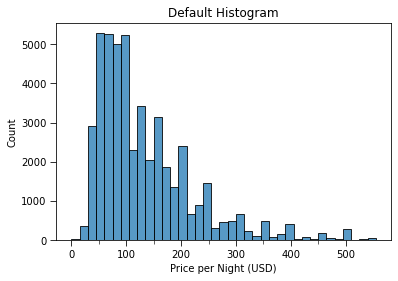

In [7]:
ax = sns.histplot( data = listings, x = "price", binwidth = 15, kde=False, 
                  binrange = (0, 550)) # NOTE: Defaults to data extremes.
style_axes(ax, 550, 100, 50)
ax.set_title('Default Histogram')
plt.show()

### 1.2 Choosing the bin size

The size of the bins is an important parameter, and using the wrong bin size can mislead by obscuring important features of the data or by creating apparent features out of random variability. 

Choosing a binwidth and center is generally a judgment call. One needs to make a choice that looks good and doesn’t misrepresent the data.

-If the bin width is **too small**, the histogram becomes overly peaky and visually busy, and the main trends in the data may be obscured. We may get a comb distribution (Figs 1.1, 1.2, 1.4)

-If the bin width is **too large**, we lose detail as smaller features in the distribution of the data may disappear.

#### 1.2.1 Manually choosing the bin size

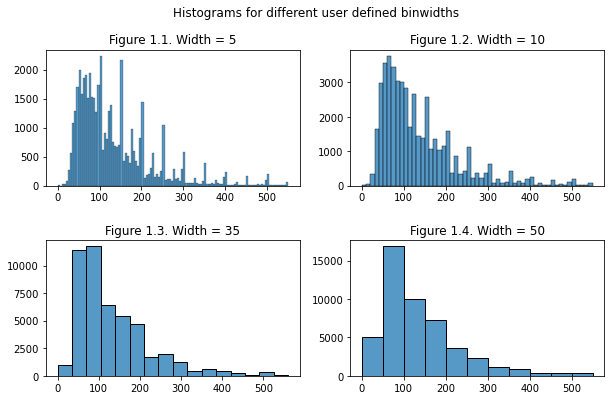

In [8]:
fig, ax = plt.subplots(2, 2, figsize = (10,6))

binwidth = 5, 10, 35, 50
for ax_i, b, fig_num in zip(ax.flatten(), binwidth, range(1,5)):
    sns.histplot( data = listings, x = "price", binwidth = b, kde=False, 
                  binrange = (0, 550), ax = ax_i) # NOTE: Defaults to data extremes.
    ax_i.set_xlabel('')
    ax_i.set_ylabel('')
    ax_i.set_title('Figure 1.' + str(fig_num)  + '. Width = ' + str(b) )
    
    
fig.suptitle('Histograms for different user defined binwidths')
plt.subplots_adjust(hspace = 0.4)
plt.show()

#### 1.2.2 Using Numpy's ``histogram_bin_edges``

Numpy has the [histogram_bin_edges](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges) function that includes different methods to calculate the optimal bin width. For this dataset, the best results are obtained using `doane`, which according to the documentation, is an improved version of Sturges’ estimator that works better with non-normal datasets.

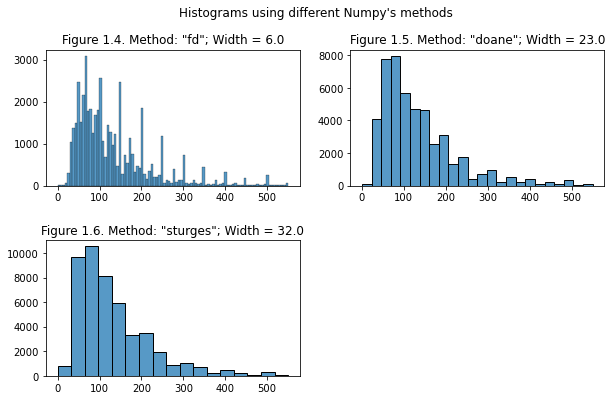

In [9]:
fig, ax = plt.subplots(2, 2, figsize = (10,6))

f_binwidth = ['fd', 'doane', 'sturges']
for ax_i, f, fig_num in zip(ax.flatten(), f_binwidth, range(4,9)):
    
    calculated_edges = np.histogram_bin_edges(listings["price"].values, bins=f, range = (0, 550))
    sns.histplot(data = listings, 
                 x = "price", 
                 bins = calculated_edges, 
                 kde=False, ax = ax_i)
    ax_i.set_xlabel('')
    ax_i.set_ylabel('')
    ax_i.set_title('Figure 1.' + str(fig_num) + '. Method: "' + f + '"; Width = ' + str(round(calculated_edges[1] - calculated_edges[0],0)) )
    
ax.flatten()[-1].set_axis_off()
fig.suptitle("Histograms using different Numpy's methods")
plt.subplots_adjust(hspace = 0.4)
plt.show()

It is also essential to keep the nature of the problem in mind. We are talking about the price of an accommodation per night. What is an adequate interval difference? 
- 5 bucks is very small (that is the price of a coffee. 
- 50 bucks is a rather large bin width. The median price is $106.
- 20-35 seems adequate to me as that would be a good tipping point to choose one accommodation over the other when staying for a couple of nights.

### 1.3 Histogram Type

There are different types of histograms depending on what is computed for each bin:

 - **Count Frequency**: shows the number of observations in each bin (i.e., count)
 - **Relative Frequency**: shows the number of observations in each bin as a ratio to the total number of data points (i.e., probability or percent).
 - **Frequency**: shows the number of observations divided by the bin width.

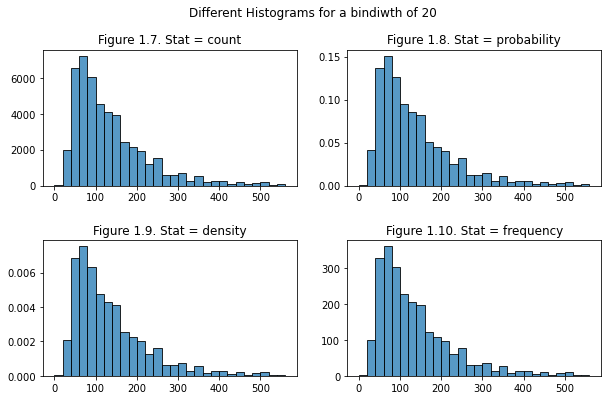

In [53]:
fig, ax = plt.subplots(2, 2, figsize = (10,6))

his_type = ['count', 'probability', 'percent', 'frequency']
for ax_i, t, fig_num in zip(ax.flatten(), his_type, range(7,11)):
    sns.histplot( data = listings, x = "price", binwidth = 20, kde=False, 
                  binrange = (0, 550), ax = ax_i, stat = t)
    ax_i.set_xlabel('')
    ax_i.set_ylabel('')
    ax_i.set_title('Figure 1.' + str(fig_num)  + '. Stat = ' + t )
    
    
fig.suptitle('Different Histograms for a bindiwth of 20')
plt.subplots_adjust(hspace = 0.4)
plt.show()

#### 1.3.1 Histogram Type `density`

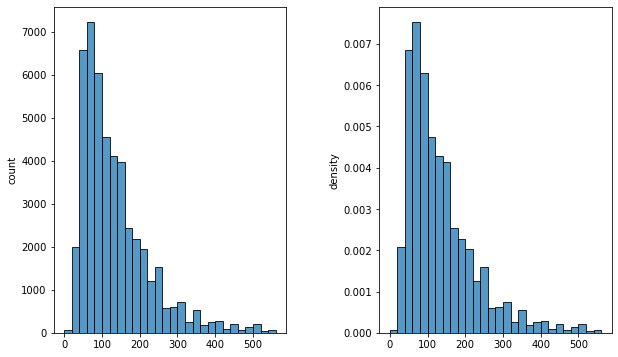

In [11]:
XArr = listings['price'][listings['price']<=560]
fig, ax = plt.subplots(1, 2, figsize = (10,6))

his_type = ['count', 'density']
for ax_i, t, in zip(ax.flatten(), his_type):
    sns.histplot( XArr, binwidth = 20, kde=False, 
                  binrange = (0, 550), ax = ax_i, stat = t)
    ax_i.set_xlabel('')
    ax_i.set_ylabel(t)
plt.subplots_adjust(wspace = 0.4)

#### 1.3.2 Histogram Type `density` under the hood

At first, I was not 100% how the function calculated the PDF based on the counts. However, after some reading:

Mathematically, the PDF

\begin{align}
f(x) & = \dfrac{P(a < x < b)}{\partial x} \\ 
\text{in a histogram} \\
P(a < x < b) & = \dfrac{\text{Observations in that range} } {\text{Total Number of Observations}} \\
{\partial x} & = \text{binwidth} \\
\text{Thus,} \\
f(x) & = \dfrac{Count}{N * b} 
\end{align}

Let's prove that

In [31]:
XArr = listings['price'][listings['price']<=560]
bins = np.arange(0,561,20)
N = len(XArr)
binwidth = 20

Manual Calcs

In [32]:
counts, bins = np.histogram(XArr, bins=np.arange(0,561,binwidth), weights=None, density=None)

In [37]:
f_x = counts / (N*binwidth)

Numpy's Histogram Function

In [27]:
hist_density, bins = np.histogram(XArr, bins=np.arange(0,561,binwidth), weights=None, density=True)

Plotting both

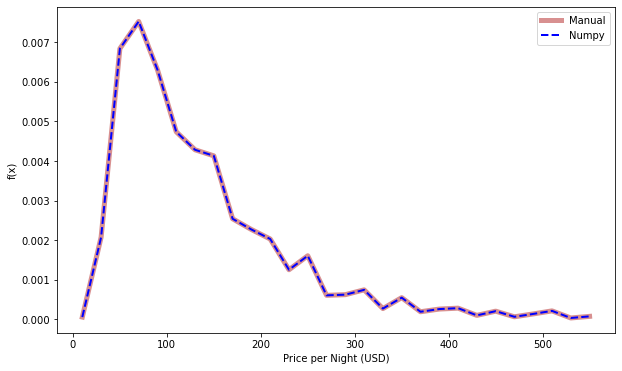

In [52]:
x_bins = bins[:-1] + 0.5*binwidth   # Get center of each bin
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(x_bins, f_x, label = 'Manual', color = 'firebrick', ls = '-', lw = 5, alpha = 0.5)
ax.plot(x_bins, hist_density, label = 'Numpy', color = 'blue', ls = '--', lw = 2)
ax.set_xlabel('Price per Night (USD)')
ax.set_ylabel('f(x)')
plt.legend()

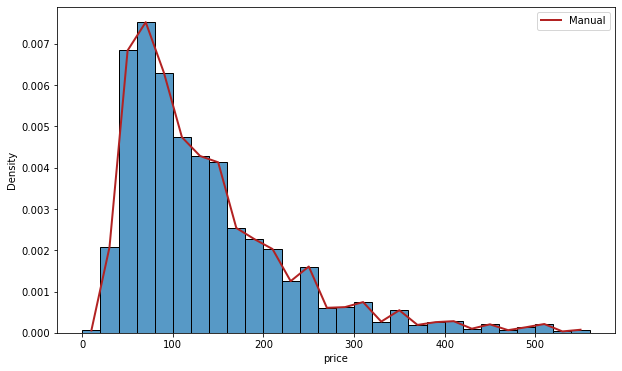

In [60]:
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(XArr, binwidth = 20, binrange = (0, 550), ax = ax, stat = 'density')
ax.plot(x_bins, f_x, label = 'Manual', color = 'firebrick', ls = '-', lw = 2)
plt.legend()

One more check: The area under the PDF must be equal to 1.

In [48]:
assert sum(f_x*binwidth) == 1.0
assert sum(hist_density*binwidth) == 1.0